In [15]:
import pandas as pd
import numpy as np
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [16]:
df = pd.read_csv('Updated_CRU.csv')
df.head()

,time,lat,lon,timeseries-tas-monthly-mean,year,month,dayofyear,quarter,week,weekofyear,...,spline_dayofyear_180,spline_dayofyear_181,spline_day_of_week_0,spline_day_of_week_1,spline_day_of_week_2,SMA_10,SMA_20,CMA,EMA_0.1,EMA_0.3
0,1901-01-31,37.0,-97.0,2.729315,1901.0,1.0,16.0,1.0,3.0,3.0,...,0.0,0.0,0.105442,0.246842,0.647716,2.729315,2.729315,2.729315,2.729315,2.729315
1,1901-02-28,37.0,-97.0,1.498751,1901.0,2.0,46.0,1.0,7.0,7.0,...,0.0,0.0,0.596696,0.064626,0.338678,2.114033,2.114033,2.114033,2.606258,2.360146
2,1901-03-31,37.0,-97.0,6.857611,1901.0,3.0,75.0,1.0,11.0,11.0,...,0.0,0.0,0.647716,0.246842,0.105442,3.695226,3.695226,3.695226,3.031394,3.709385
3,1901-04-30,37.0,-97.0,11.149125,1901.0,4.0,106.0,2.0,16.0,16.0,...,0.0,0.0,0.044218,0.522352,0.433431,5.558701,5.558701,5.558701,3.843167,5.941307
4,1901-05-31,37.0,-97.0,16.921551,1901.0,5.0,136.0,2.0,20.0,20.0,...,0.0,0.0,0.338678,0.064626,0.596696,7.831271,7.831271,7.831271,5.151005,9.235380


In [17]:
df_ft = df[['time', 'lat', 'lon', 'timeseries-tas-monthly-mean', 'year', 'month', 'dayofyear', 'quarter', 'week', 'weekofyear']].copy()

In [18]:
df_ft['time'] = pd.to_datetime(df_ft['time'])
df_ft.set_index('time', inplace=True)
df_ft = df_ft['timeseries-tas-monthly-mean'].resample('M').mean()

In [19]:
df_ft = df_ft.reset_index()

In [20]:
df_ft.head()

,time,timeseries-tas-monthly-mean
0,1901-01-31,2.729315
1,1901-02-28,1.498751
2,1901-03-31,6.857611
3,1901-04-30,11.149125
4,1901-05-31,16.921551


In [6]:
df_ft['year'] = df_ft['time'].dt.year
df_ft["week"] = df_ft['time'].dt.isocalendar().week
df_ft['month'] = df_ft['time'].dt.month
df_ft['weekofyear'] = df_ft['time'].dt.weekofyear
df_ft['quarter'] = df_ft['time'].dt.quarter
df_ft['dayofyear'] = df_ft['time'].dt.dayofyear
df_ft['dayofweek'] = df_ft['time'].dt.dayofweek
df_ft["is_month_start"] = df_ft['time'].dt.is_month_start
df_ft["is_month_end"] = df_ft['time'].dt.is_month_end
df_ft["is_quarter_start"] = df_ft['time'].dt.is_quarter_start
df_ft["is_quarter_end"] = df_ft['time'].dt.is_quarter_end
df_ft["is_year_start"] = df_ft['time'].dt.is_year_start
df_ft["is_year_end"] = df_ft['time'].dt.is_year_end
df_ft["days_in_month"] = df_ft['time'].dt.days_in_month
df_ft["is_leap_year"] = df_ft['time'].dt.is_leap_year
df_ft['is_weekend'] = np.where(df_ft['dayofweek'].isin([5, 6]), 1, 0)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15968\3679021985.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_ft['weekofyear'] = df_ft['time'].dt.weekofyear


In [7]:
df_ft

,time,timeseries-tas-monthly-mean,year,week,month,weekofyear,quarter,dayofyear,dayofweek,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,days_in_month,is_leap_year,is_weekend
0,1901-01-31,2.729315,1901,5,1,5,1,31,3,False,True,False,False,False,False,31,False,0
1,1901-02-28,1.498751,1901,9,2,9,1,59,3,False,True,False,False,False,False,28,False,0
2,1901-03-31,6.857611,1901,13,3,13,1,90,6,False,True,False,True,False,False,31,False,1
3,1901-04-30,11.149125,1901,18,4,18,2,120,1,False,True,False,False,False,False,30,False,0
4,1901-05-31,16.921551,1901,22,5,22,2,151,4,False,True,False,False,False,False,31,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,2021-08-31,24.077919,2021,35,8,35,3,243,1,False,True,False,False,False,False,31,False,0
1448,2021-09-30,21.058061,2021,39,9,39,3,273,3,False,True,False,True,False,False,30,False,0
1449,2021-10-31,16.111419,2021,43,10,43,4,304,6,False,True,False,False,False,False,31,False,1
1450,2021-11-30,9.549008,2021,48,11,48,4,334,1,False,True,False,False,False,False,30,False,0


In [8]:
X = df_ft.drop(['time', 'timeseries-tas-monthly-mean'], axis=1)
y = df_ft['timeseries-tas-monthly-mean']

In [9]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestRegressor(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

In [10]:
perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.3465 ± 0.0149,weekofyear
0.2548 ± 0.0181,week
0.0732 ± 0.0093,dayofyear
0.0475 ± 0.0053,month
0.0142 ± 0.0030,quarter
0.0067 ± 0.0006,is_quarter_end
0.0059 ± 0.0010,days_in_month
0.0049 ± 0.0027,year
0.0008 ± 0.0003,is_year_end
0.0006 ± 0.0011,dayofweek


In [11]:
import shap
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(train_X)

In [12]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, train_X)

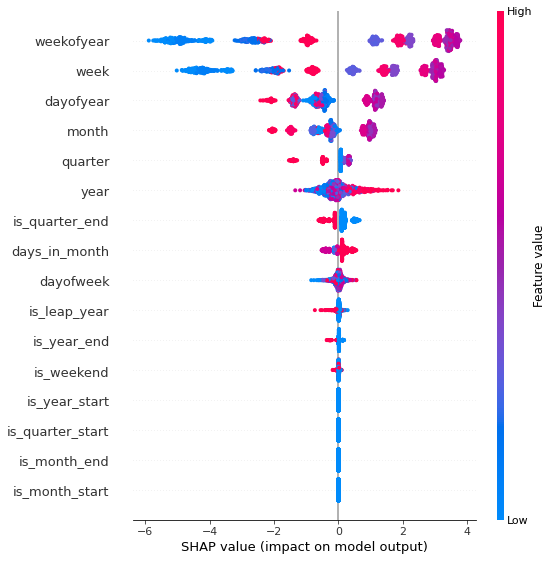

In [13]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(train_X)
shap.summary_plot(shap_values, train_X)